<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Data_Gathering_with_API_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

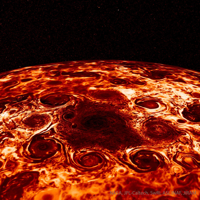


✅ Asteroid data successfully saved as 'asteroids_data.csv'!


,Asteroid ID,Asteroid Name,Minimal Estimated Diameter (km),Absolute Magnitude,Relative Velocity (km/s)
0,3709250,(2015 BY512),0.133830,21.49,17.3279837746
1,3785931,(2017 TA6),0.010105,27.10,16.5818306912
2,3843836,(2019 RB3),0.038420,24.20,17.8679370831
3,3989355,(2020 CB),0.007666,27.70,6.8791329628
4,54131354,(2021 EU3),0.009651,27.20,4.3643246233


In [10]:
import requests as re
import pandas as pd
from PIL import Image
from io import BytesIO

api_key = 'Jm3fOecG3EUJp7xicKxenHekfHK0ejEKwK1TNDwA'

image_url = f'https://api.nasa.gov/planetary/apod?api_key={api_key}'

# Getting the image URL from API response
response = re.get(image_url).json()
img_url = response['hdurl']

# Fetching the image data
if img_url:
  img_response = re.get(img_url, stream=True)
  img = Image.open(BytesIO(img_response.content))
  img = img.resize((200,200))
  display(img)
else:
  print("Sorry, No Astronomy picture of the day today")

# Going through the list of the provided API endpoints for 'Asteroids - NeoWs' option
neows_url = f'https://api.nasa.gov/neo/rest/v1/feed?api_key={api_key}'
neows_response = re.get(neows_url).json()

today = list(neows_response["near_earth_objects"].keys())[0]
asteroids = neows_response["near_earth_objects"][today]

asteroid_data = []

for asteroid in asteroids:
    asteroid_id = asteroid.get("id", "N/A")
    asteroid_name = asteroid.get("name", "Unknown")

    diameter = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_min"]
    magnitude = asteroid.get("absolute_magnitude_h", "N/A")
    velocity = asteroid["close_approach_data"][0]["relative_velocity"]["kilometers_per_second"]
    asteroid_data.append([asteroid_id, asteroid_name, diameter, magnitude, velocity])

df_asteroids = pd.DataFrame(asteroid_data, columns=[
    "Asteroid ID", "Asteroid Name",
    "Minimal Estimated Diameter (km)",
    "Absolute Magnitude", "Relative Velocity (km/s)"
])

# Saving to CSV
df_asteroids.to_csv("asteroids_data.csv", index=False)

print("\n✅ Asteroid data successfully saved as 'asteroids_data.csv'!")

# Displaying first few rows of the DataFrame
df_asteroids.head()